### What did the media had to say about these teams?

In [1]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
import os
import glob
import calendar
import json

In [2]:
# Folder locations
celtics_path = '../Data/NYT/Sports/Boston Celtics'
patriots_path = '../Data/NYT/Sports/New England Patriots'

In [3]:
# Get all the important words from the articles
word_bag = []
for monthly_path in glob.glob(celtics_path + '/*'):
    for article_path in glob.glob(monthly_path + '/*.json'):
        with open(article_path, 'r', encoding="utf-8-sig") as f:     
            jsonobj = json.load(f)
            para = jsonobj['lead_paragraph']
            word_bag.extend(para.split())

word_bag_patriots = []
for monthly_path in glob.glob(patriots_path + '/*'):
    for article_path in glob.glob(monthly_path + '/*.json'):
        with open(article_path, 'r', encoding="utf-8-sig") as f:     
            jsonobj = json.load(f)
            para = jsonobj['lead_paragraph']
            if (para):
                word_bag_patriots.extend(para.split())
            else:
                main_head = jsonobj['headline']['main'] 
                word_bag_patriots.extend(main_head.split())
                            

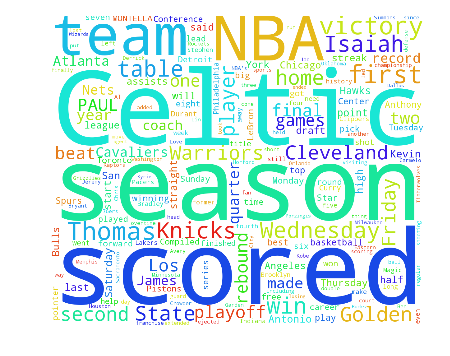

In [4]:
# Plot word clouds for both teams from the published articles
celtic_stopwords = [ 'Boston', 'points', 'game', 'night', 'th', 'tr', 'New']
celtic_stopwords.extend(STOPWORDS)
wordcloud = WordCloud(stopwords=celtic_stopwords,
                          background_color='white',
                          width=1200,
                          height=1000
                         ).generate(' '.join(word_bag))


plt.imshow(wordcloud)
plt.axis('off')
plt.show()

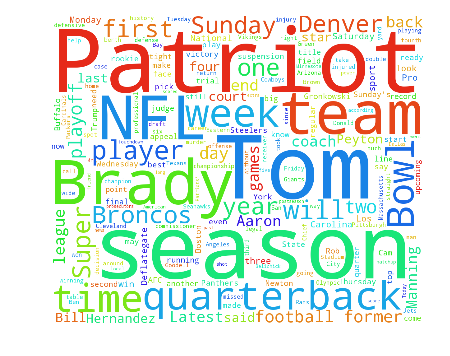

In [5]:
# Plot word clouds for both teams from the published articles

patriots_stopwords = [ 'England', 'points', 'game', 'night', 'th', 'tr', 'New']
patriots_stopwords.extend(STOPWORDS)
wordcloud = WordCloud(stopwords=patriots_stopwords,
                          background_color='white',
                          width=1200,
                          height=1000
                         ).generate(' '.join(word_bag_patriots))


plt.imshow(wordcloud)
plt.axis('off')
plt.show()